In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blinkit_df=pd.read_excel("D:/portfolio projects/Blinkit/BlinkIT Grocery Data.xlsx")
blinkit_df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [3]:
blinkit_df.shape
blinkit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
blinkit_df.columns = (
    blinkit_df.columns
      .str.strip()              
      .str.lower()              
      .str.replace(" ", "_")    
)

In [5]:
blinkit_df.isnull().sum()

item_fat_content                0
item_identifier                 0
item_type                       0
outlet_establishment_year       0
outlet_identifier               0
outlet_location_type            0
outlet_size                     0
outlet_type                     0
item_visibility                 0
item_weight                  1463
sales                           0
rating                          0
dtype: int64

In [6]:
blinkit_df["item_weight"] = (
    blinkit_df.groupby("item_type")["item_weight"]
      .transform(lambda x: x.fillna(x.median()))
)


In [7]:
blinkit_df.duplicated().sum()

np.int64(0)

In [8]:
blinkit_df["item_fat_content"] = (
   blinkit_df["item_fat_content"]
      .str.strip()
      .str.lower()
      .replace({
          "lf": "Low Fat",
          "low fat": "Low Fat",
          "reg": "Regular",
          "regular": "Regular"
      })
)


In [10]:
categorical_cols =blinkit_df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\n{col}")
    print(blinkit_df[col].nunique())



item_fat_content
2

item_identifier
1559

item_type
16

outlet_identifier
10

outlet_location_type
3

outlet_size
3

outlet_type
4


In [ ]:
blinkit_df.describe()

,outlet_establishment_year,item_visibility,item_weight,sales,rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.813390,140.992783,3.965857
std,3.189396,0.051598,4.241384,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,9.310000,93.826500,4.000000
50%,2016.000000,0.053931,12.850000,143.012800,4.000000
75%,2018.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [11]:
blinkit_df["sales"].skew(), blinkit_df["item_visibility"].skew()


(np.float64(0.12720220170287666), np.float64(1.167089786851849))

In [ ]:
blinkit_df.groupby("item_type")["sales"].sum().sort_values(ascending=False)


item_type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Canned                    90706.7290
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1670
Breads                    35379.1198
Hard Drinks               29334.6806
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: sales, dtype: float64

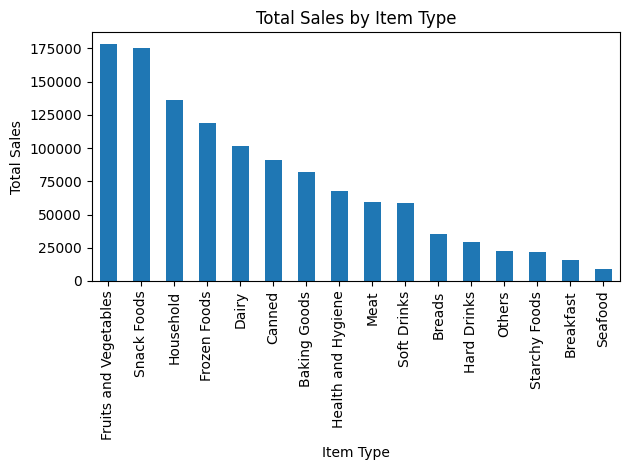

In [ ]:
sales_by_item = (
   blinkit_df.groupby("item_type")["sales"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure()
sales_by_item.plot(kind="bar")
plt.title("Total Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
blinkit_df.groupby("outlet_type")["sales"].sum()

outlet_type
Grocery Store        151939.1490
Supermarket Type1    787549.8928
Supermarket Type2    131477.7764
Supermarket Type3    130714.6746
Name: sales, dtype: float64

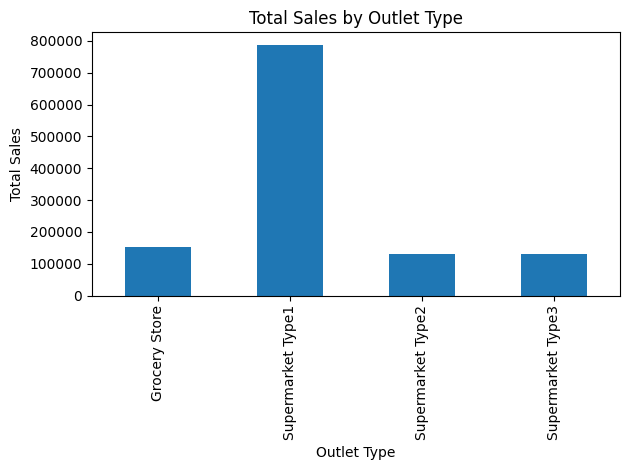

In [ ]:
sales_by_outlet = blinkit_df.groupby("outlet_type")["sales"].sum()

plt.figure()
sales_by_outlet.plot(kind="bar")
plt.title("Total Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

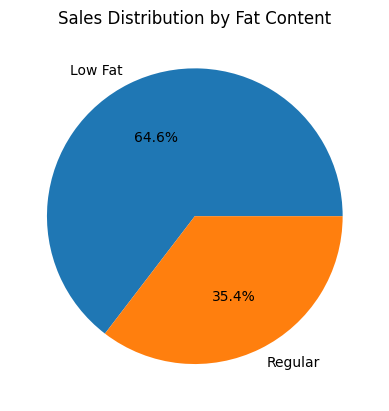

In [ ]:
blinkit_df.groupby("item_fat_content")["sales"].sum().plot(
    kind="pie", autopct="%1.1f%%"
)
plt.title("Sales Distribution by Fat Content")
plt.ylabel("")
plt.show()

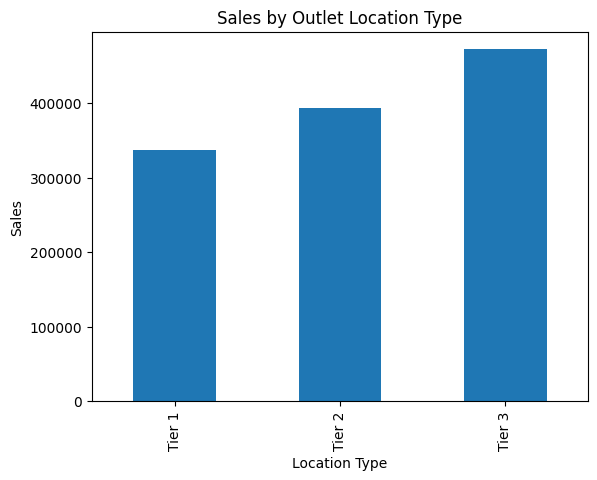

In [ ]:
blinkit_df.groupby("outlet_location_type")["sales"].sum().plot(kind="bar")
plt.title("Sales by Outlet Location Type")
plt.xlabel("Location Type")
plt.ylabel("Sales")
plt.show()


In [ ]:
# Rating distribution
blinkit_df["rating"].value_counts().sort_index()

rating
1.0     114
1.2       1
1.3       2
1.4       1
1.5      11
1.7       8
1.8       5
1.9       2
2.0      74
2.1       4
2.2       9
2.3      26
2.4      11
2.5      48
2.6      14
2.7      21
2.8      49
2.9      24
3.0     193
3.1      49
3.2      55
3.3     121
3.4      83
3.5     171
3.6     150
3.7     211
3.8     253
3.9     302
4.0    3339
4.1     524
4.2     673
4.3     694
4.4     340
4.5     256
4.6     102
4.7      79
4.8      62
4.9      15
5.0     427
Name: count, dtype: int64

In [ ]:
# Average rating by outlet type
blinkit_df.groupby("outlet_type")["rating"].mean().sort_values(ascending=False)

outlet_type
Grocery Store        3.985873
Supermarket Type2    3.971228
Supermarket Type1    3.963242
Supermarket Type3    3.952941
Name: rating, dtype: float64

In [ ]:
# Average rating by item type
blinkit_df.groupby("item_type")["rating"].mean().sort_values(ascending=False)

item_type
Meat                     4.023059
Household                3.998681
Canned                   3.994299
Health and Hygiene       3.986154
Baking Goods             3.983025
Frozen Foods             3.971145
Dairy                    3.965836
Seafood                  3.959375
Fruits and Vegetables    3.956169
Others                   3.954438
Snack Foods              3.948917
Breakfast                3.932727
Soft Drinks              3.920674
Starchy Foods            3.920270
Hard Drinks              3.907477
Breads                   3.881275
Name: rating, dtype: float64

In [ ]:
# Unique item count per outlet
blinkit_df.groupby("outlet_identifier")["item_identifier"].nunique().sort_values(ascending=False)

outlet_identifier
OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: item_identifier, dtype: int64

In [ ]:
# Average item visibility by item type
blinkit_df.groupby("item_type")["item_visibility"].mean().sort_values(ascending=False)

item_type
Breakfast                0.085723
Seafood                  0.074976
Dairy                    0.072427
Baking Goods             0.069169
Fruits and Vegetables    0.068513
Canned                   0.068129
Starchy Foods            0.067564
Snack Foods              0.066850
Breads                   0.066255
Frozen Foods             0.065645
Hard Drinks              0.064943
Soft Drinks              0.063972
Meat                     0.062284
Household                0.061322
Others                   0.060241
Health and Hygiene       0.055216
Name: item_visibility, dtype: float64

In [ ]:
total_sales =blinkit_df["sales"].sum()
avg_sales =blinkit_df["sales"].mean()
avg_rating =blinkit_df["rating"].mean()
total_items =blinkit_df["item_identifier"].nunique()
total_outlets =blinkit_df["outlet_identifier"].nunique()

total_sales, avg_sales, avg_rating, total_items, total_outlets


(np.float64(1201681.4928000001),
 np.float64(140.99278338613166),
 np.float64(3.965857092573038),
 1559,
 10)

In [ ]:
blinkit_df.groupby("outlet_type").agg(
    total_sales=("sales", "sum"),
    avg_sales=("sales", "mean"),
    avg_rating=("rating", "mean")
)


,total_sales,avg_sales,avg_rating
outlet_type,,,
Grocery Store,151939.1490,140.294690,3.985873
Supermarket Type1,787549.8928,141.213895,3.963242
Supermarket Type2,131477.7764,141.678638,3.971228
Supermarket Type3,130714.6746,139.801791,3.952941


In [ ]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "abhi123" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = "blinkit_db"    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "blinkit"   # choose any table name
blinkit_df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'blinkit' in database 'blinkit_db'.
